**Name  : Abeer Abdelnasser Ahmed Wafa**

**The Sparks Foundation (Data Science & Business Analysis Intern) July_2022**

**Task 7 : Stock Market prediction using Numerical and Textual analysis**

In [ ]:
# import libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib import pyplot
from numpy import concatenate
from math import sqrt
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('vader_lexicon')
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
# load the dataset
Price = pd.read_csv('BSESN.csv')
Price.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-12-17,41052.359375,41401.648438,41005.179688,41352.171875,41352.171875,19000.0
1,2019-12-18,41442.750000,41614.769531,41358.468750,41558.570313,41558.570313,24300.0
2,2019-12-19,41571.820313,41719.289063,41456.398438,41673.921875,41673.921875,33300.0
3,2019-12-20,41746.199219,41809.960938,41636.109375,41681.539063,41681.539063,33600.0
4,2019-12-23,41548.261719,41701.621094,41474.609375,41642.660156,41642.660156,6200.0


In [ ]:
cols = ['Date','Category','News']
india_news = pd.read_csv('india-news-headlines.csv',names = cols)
india_news = india_news.dropna(axis = 0, how ='any')
india_news.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Date,Category,News
0,publish_date,headline_category,headline_text
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa


In [ ]:
# preprocessing the dataset 
# Dropping the Category column and the values of 0 index as they don't important for our analysis.
india_news.drop(0, inplace=True)
india_news.drop('Category', axis = 1, inplace=True)

In [ ]:
# Handling the Datatyoes 
india_news['Date'] = pd.to_datetime(india_news['Date'],format= '%Y%m%d')
Price['Date'] = pd.to_datetime(Price['Date'])

In [ ]:
india_news['News'] = india_news.groupby(['Date']).transform(lambda x : ' '.join(x)) 
india_news = india_news.drop_duplicates() 
india_news.reset_index(inplace = True, drop = True)
india_news

,Date,News
0,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
1,2001-01-03,Powerless north India gropes in the dark Think...
2,2001-01-04,The string that pulled Stephen Hawking to Indi...
3,2001-01-05,Light combat craft takes India into club class...
4,2001-01-06,Light combat craft takes India into club class...
...,...,...
3627,2011-01-19,My ex doesn't want me: Pratik Saali is not a g...
3628,2011-01-20,Neetu Chandra denies going panty-less! Aishwar...
3629,2011-01-21,Giving the kids a dressing up AK Hangal's ill ...
3630,2011-01-22,DTE seeks report from tech institutes Corporat...


In [ ]:
Price.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-12-17,41052.359375,41401.648438,41005.179688,41352.171875,41352.171875,19000.0
1,2019-12-18,41442.750000,41614.769531,41358.468750,41558.570313,41558.570313,24300.0
2,2019-12-19,41571.820313,41719.289063,41456.398438,41673.921875,41673.921875,33300.0
3,2019-12-20,41746.199219,41809.960938,41636.109375,41681.539063,41681.539063,33600.0
4,2019-12-23,41548.261719,41701.621094,41474.609375,41642.660156,41642.660156,6200.0


In [ ]:
Price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       252 non-null    datetime64[ns]
 1   Open       250 non-null    float64       
 2   High       250 non-null    float64       
 3   Low        250 non-null    float64       
 4   Close      250 non-null    float64       
 5   Adj Close  250 non-null    float64       
 6   Volume     250 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 13.9 KB


In [ ]:
Price.describe()

,Open,High,Low,Close,Adj Close,Volume
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,37804.237375,38071.182859,37422.826992,37745.454117,37745.454117,19134.000000
std,4507.985769,4380.974060,4647.212947,4535.304336,4535.304336,16540.261333
min,26499.810547,27462.869141,25638.900391,25981.240234,25981.240234,0.000000
25%,34369.659179,34779.932618,33975.389648,34257.097656,34257.097656,13125.000000
50%,38489.480469,38750.359375,38234.869140,38425.974610,38425.974610,17000.000000
75%,41179.222656,41376.482422,41023.923828,41135.233399,41135.233399,21075.000000
max,46774.320313,46992.570313,46627.601563,46890.339844,46890.339844,188300.000000


In [ ]:
india_news.head()

,Date,News
0,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
1,2001-01-03,Powerless north India gropes in the dark Think...
2,2001-01-04,The string that pulled Stephen Hawking to Indi...
3,2001-01-05,Light combat craft takes India into club class...
4,2001-01-06,Light combat craft takes India into club class...


In [ ]:
india_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3632 entries, 0 to 3631
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3632 non-null   datetime64[ns]
 1   News    3632 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 56.9+ KB


In [ ]:
india_news.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,Date,News
count,3632,3632
unique,3632,3632
top,2001-01-02 00:00:00,Status quo will not be disturbed at Ayodhya; s...
freq,1,1
first,2001-01-02 00:00:00,NaN
last,2011-01-23 00:00:00,NaN


In [ ]:
Price.dropna(inplace = True)

Text(0, 0.5, 'Close')

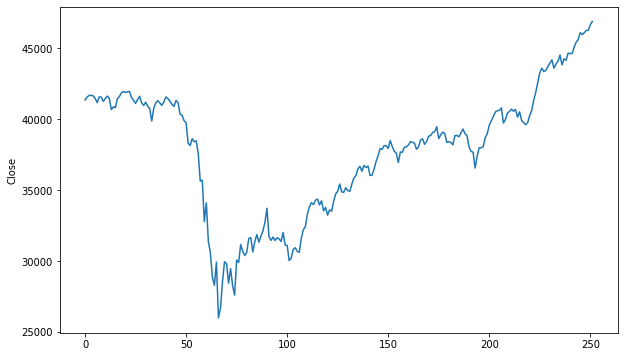

In [ ]:
plt.figure(figsize=(10, 6))
Price['Close'].plot()
plt.ylabel('Close')

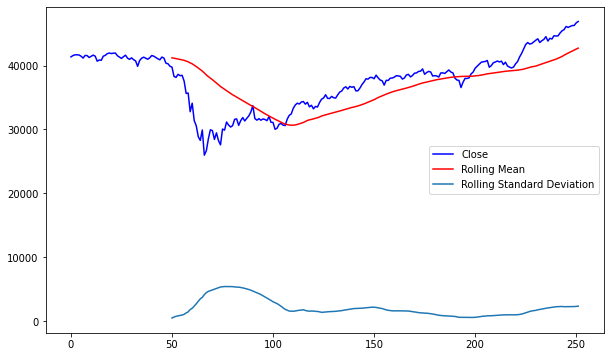

In [ ]:
#Plotting moving average
close = Price['Close']
ma = close.rolling(window = 50).mean()
std = close.rolling(window = 50).std()

plt.figure(figsize=(10, 6))
Price['Close'].plot(color = 'b', label = 'Close')
ma.plot(color = 'r', label = 'Rolling Mean')
std.plot(label = 'Rolling Standard Deviation')
plt.legend()

Text(0.5, 1.0, 'Returns')

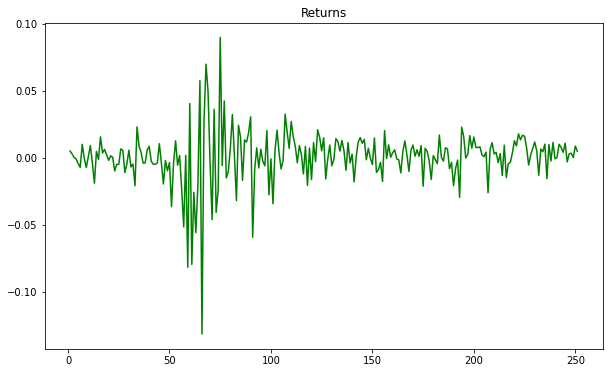

In [ ]:
#Plotting returns
returns = close / close.shift(1) - 1

plt.figure(figsize = (10,6))
returns.plot(label='Return', color = 'g')
plt.title("Returns")

In [ ]:
# Handling the Headlines (cleaning it)
cleaning_headlines = []

for i in range(0,len(india_news['News'])):
    news = re.sub('[^a-zA-Z]',' ',india_news['News'][i])
    news = news.lower()
    news = news.split()
    news = [ps.stem(word) for word in news if not word in set(stopwords.words('english'))]
    print(i)
    news=' '.join(news)
    cleaning_headlines.append(news)    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [ ]:
india_news['News'] = pd.Series(cleaning_headlines)
india_news

,Date,News
0,2001-01-02,statu quo disturb ayodhya say vajpaye fissur h...
1,2001-01-03,powerless north india grope dark think laxman ...
2,2001-01-04,string pull stephen hawk india vajpaye give bi...
3,2001-01-05,light combat craft take india club class hawk ...
4,2001-01-06,light combat craft take india club class hawk ...
...,...,...
3627,2011-01-19,ex want pratik saali gaali sudhir tell sharmil...
3628,2011-01-20,neetu chandra deni go panti less aishwarya aam...
3629,2011-01-21,give kid dress ak hangal ill broke dhobi ghat ...
3630,2011-01-22,dte seek report tech institut corpor oppos kot...


In [ ]:
#Functions to get the subjectivity and polarity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return  TextBlob(text).sentiment.polarity

In [ ]:
#Adding subjectivity and polarity columns
india_news['Subjectivity'] = india_news['News'].apply(getSubjectivity)
india_news['Polarity'] = india_news['News'].apply(getPolarity)
india_news

,Date,News,Subjectivity,Polarity
0,2001-01-02,statu quo disturb ayodhya say vajpaye fissur h...,0.298148,0.099074
1,2001-01-03,powerless north india grope dark think laxman ...,0.429167,0.025000
2,2001-01-04,string pull stephen hawk india vajpaye give bi...,0.475140,0.032481
3,2001-01-05,light combat craft take india club class hawk ...,0.458412,0.296404
4,2001-01-06,light combat craft take india club class hawk ...,0.425758,0.389394
...,...,...,...,...
3627,2011-01-19,ex want pratik saali gaali sudhir tell sharmil...,0.350529,0.088851
3628,2011-01-20,neetu chandra deni go panti less aishwarya aam...,0.336776,0.063600
3629,2011-01-21,give kid dress ak hangal ill broke dhobi ghat ...,0.365818,0.023326
3630,2011-01-22,dte seek report tech institut corpor oppos kot...,0.389635,0.041496


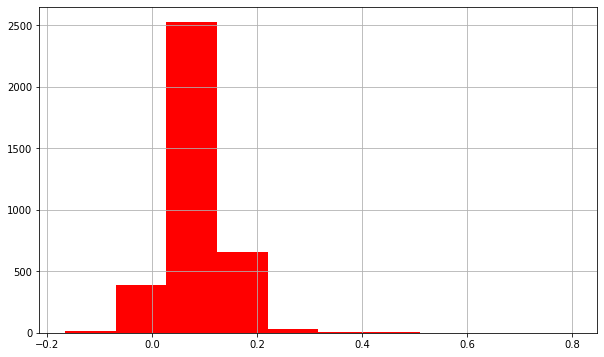

In [ ]:
plt.figure(figsize = (10,6))
india_news['Polarity'].hist(color = 'Red')

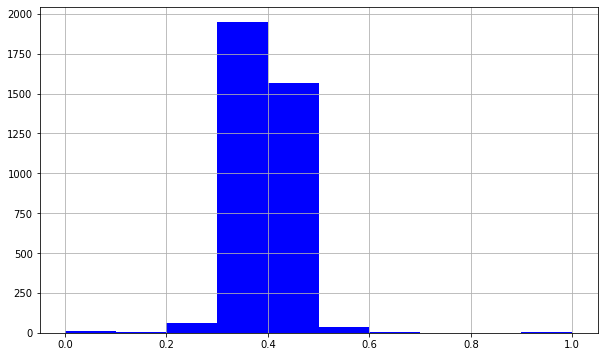

In [ ]:
plt.figure(figsize = (10,6))
india_news['Subjectivity'].hist(color = 'blue')

In [ ]:
#Adding sentiment score to india_news
sen = SentimentIntensityAnalyzer()

india_news['Compound'] = [sen.polarity_scores(i)['compound'] for i in india_news['News']]
india_news['Negative'] = [sen.polarity_scores(i)['neg'] for i in india_news['News']]
india_news['Neutral'] = [sen.polarity_scores(i)['neu'] for i in india_news['News']]
india_news['Positive'] = [sen.polarity_scores(i)['pos'] for i in india_news['News']]
india_news

,Date,News,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,2001-01-02,statu quo disturb ayodhya say vajpaye fissur h...,0.298148,0.099074,-0.8555,0.125,0.773,0.102
1,2001-01-03,powerless north india grope dark think laxman ...,0.429167,0.025000,-0.5994,0.132,0.755,0.113
2,2001-01-04,string pull stephen hawk india vajpaye give bi...,0.475140,0.032481,0.9169,0.099,0.791,0.110
3,2001-01-05,light combat craft take india club class hawk ...,0.458412,0.296404,-0.3612,0.171,0.659,0.170
4,2001-01-06,light combat craft take india club class hawk ...,0.425758,0.389394,-0.7579,0.207,0.649,0.144
...,...,...,...,...,...,...,...,...
3627,2011-01-19,ex want pratik saali gaali sudhir tell sharmil...,0.350529,0.088851,-0.9997,0.128,0.794,0.078
3628,2011-01-20,neetu chandra deni go panti less aishwarya aam...,0.336776,0.063600,-0.9996,0.129,0.785,0.086
3629,2011-01-21,give kid dress ak hangal ill broke dhobi ghat ...,0.365818,0.023326,-0.9999,0.151,0.768,0.081
3630,2011-01-22,dte seek report tech institut corpor oppos kot...,0.389635,0.041496,-0.9997,0.135,0.782,0.083


In [ ]:
# Merging our findings (the updated News dataframe) with the Price dataframe
Merge_data = pd.concat([Price, india_news],axis=1,join='inner')
print(Price)
Merge_data.drop('Date', axis = 1, inplace=True)
Merge_data.drop('News', axis=1, inplace=True)
print(Merge_data.columns)
print(len(Merge_data))
print(len(Price))
print(len(india_news))

          Date          Open          High           Low         Close  \
0   2019-12-17  41052.359375  41401.648438  41005.179688  41352.171875   
1   2019-12-18  41442.750000  41614.769531  41358.468750  41558.570313   
2   2019-12-19  41571.820313  41719.289063  41456.398438  41673.921875   
3   2019-12-20  41746.199219  41809.960938  41636.109375  41681.539063   
4   2019-12-23  41548.261719  41701.621094  41474.609375  41642.660156   
..         ...           ...           ...           ...           ...   
247 2020-12-11  46060.320313  46309.628906  45706.218750  46099.011719   
248 2020-12-14  46284.699219  46373.339844  45951.531250  46253.460938   
249 2020-12-15  46287.390625  46350.300781  45841.671875  46263.171875   
250 2020-12-16  46573.308594  46704.968750  46402.199219  46666.460938   
251 2020-12-17  46774.320313  46992.570313  46627.601563  46890.339844   

        Adj Close   Volume  
0    41352.171875  19000.0  
1    41558.570313  24300.0  
2    41673.921875  33300

In [ ]:
# getting our data series ready for Multivariate Time Series Forecasting
from pandas import DataFrame as df
from pandas import concat
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df1 = df(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df1.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df1.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [ ]:
# scale our data for optimal performance
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
values = Merge_data.values
print(Merge_data)
print(values)
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0,1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
reframed.drop(reframed.columns[[12,13,14,16,17,18,19,20,21,22,23]], axis=1, inplace=True)
print(reframed.columns)

             Open          High           Low         Close     Adj Close  \
0    41052.359375  41401.648438  41005.179688  41352.171875  41352.171875   
1    41442.750000  41614.769531  41358.468750  41558.570313  41558.570313   
2    41571.820313  41719.289063  41456.398438  41673.921875  41673.921875   
3    41746.199219  41809.960938  41636.109375  41681.539063  41681.539063   
4    41548.261719  41701.621094  41474.609375  41642.660156  41642.660156   
..            ...           ...           ...           ...           ...   
247  46060.320313  46309.628906  45706.218750  46099.011719  46099.011719   
248  46284.699219  46373.339844  45951.531250  46253.460938  46253.460938   
249  46287.390625  46350.300781  45841.671875  46263.171875  46263.171875   
250  46573.308594  46704.968750  46402.199219  46666.460938  46666.460938   
251  46774.320313  46992.570313  46627.601563  46890.339844  46890.339844   

      Volume  Subjectivity  Polarity  Compound  Negative  Neutral  Positive

In [ ]:
# split into train and test sets
values = reframed.values
print((values).shape)
n_train_hours = 90
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(249, 13)
(90, 1, 12) (90,) (159, 1, 12) (159,)


Epoch 1/50
2/2 - 3s - loss: 0.4585 - val_loss: 0.4743 - 3s/epoch - 2s/step
Epoch 2/50
2/2 - 0s - loss: 0.4247 - val_loss: 0.4406 - 39ms/epoch - 20ms/step
Epoch 3/50
2/2 - 0s - loss: 0.3916 - val_loss: 0.4068 - 36ms/epoch - 18ms/step
Epoch 4/50
2/2 - 0s - loss: 0.3590 - val_loss: 0.3729 - 53ms/epoch - 26ms/step
Epoch 5/50
2/2 - 0s - loss: 0.3268 - val_loss: 0.3389 - 56ms/epoch - 28ms/step
Epoch 6/50
2/2 - 0s - loss: 0.2962 - val_loss: 0.3046 - 38ms/epoch - 19ms/step
Epoch 7/50
2/2 - 0s - loss: 0.2657 - val_loss: 0.2700 - 38ms/epoch - 19ms/step
Epoch 8/50
2/2 - 0s - loss: 0.2371 - val_loss: 0.2362 - 46ms/epoch - 23ms/step
Epoch 9/50
2/2 - 0s - loss: 0.2132 - val_loss: 0.2067 - 38ms/epoch - 19ms/step
Epoch 10/50
2/2 - 0s - loss: 0.1931 - val_loss: 0.1818 - 38ms/epoch - 19ms/step
Epoch 11/50
2/2 - 0s - loss: 0.1764 - val_loss: 0.1609 - 38ms/epoch - 19ms/step
Epoch 12/50
2/2 - 0s - loss: 0.1626 - val_loss: 0.1435 - 33ms/epoch - 17ms/step
Epoch 13/50
2/2 - 0s - loss: 0.1506 - val_loss: 0.129

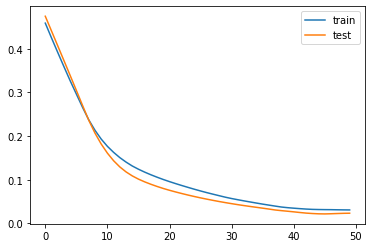

In [ ]:
# design the network
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam') 

# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)

# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
# make a prediction
print(test_X.shape)
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[2]))
print(test_X.shape)
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

(159, 1, 12)
(159, 1, 12)
Test RMSE: 571.661
